# CHAPTER 1

### basic building blocks of the Keras API


basic building blocks of Keras by creating a very simple fully connected neural
network. We will create 3 same models with different way and train them with mnist dataset

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import *

Firstly We will create a model using the Sequential API by passing a list of layers to the Sequential
constructor. input shape depends the dataset that we use. It is 28x28x1 because of mnist.

In [2]:
layers = [Dense(256, input_shape=(28 * 28 * 1,), activation='sigmoid'),
          Dense(128, activation='sigmoid'),
          Dense(10, activation='softmax')]
sequential_model2 = Sequential(layers)

Second way to create a model , we are using the add() method to add one layer at a time. The numbers in
each layer correspond to the number of neurons or units it contains

In [3]:
sequential_model = Sequential()
sequential_model.add(Dense(256, input_shape=(28 * 28 * 1,), activation='sigmoid'))
sequential_model.add(Dense(128, activation='sigmoid'))
sequential_model.add(Dense(10, activation='softmax'))

Third way to create a model using the Functional API. we should add the input of layer at the end of new layer.

In [4]:
input_layer = Input(shape=(28 * 28 * 1,))
dense_1 = Dense(256, activation='sigmoid')(input_layer)
dense_2 = Dense(128, activation='sigmoid')(dense_1)
predictions = Dense(10, activation='softmax')(dense_2)
functional_model = Model(inputs=input_layer, outputs=predictions)

Fourth way to create a model using an object-oriented approach by sub-classing tensorflow.keras.models.Model.

In [5]:
class ClassModel(Model):
    def __init__(self):
        super(ClassModel, self).__init__()

        self.dense_1 = Dense(256, activation='sigmoid')
        self.dense_2 = Dense(256, activation='sigmoid')
        self.predictions = Dense(10, activation='softmax')

    def call(self, inputs, **kwargs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)

        return self.predictions(x)


class_model = ClassModel()

Let's prepare dataset. We must reshape the images into vector format because that's the format that's expected by a
fully connected network.

But first check what we have

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
print('X_train shape is :{}'.format(X_train.shape))
print('y_train shape is :{}'.format(y_train.shape))
print('X_test shape is :{}'.format(X_test.shape))
print('y_test shape is :{}'.format(y_test.shape))

X_train shape is :(60000, 28, 28)
y_train shape is :(60000,)
X_test shape is :(10000, 28, 28)
y_test shape is :(10000,)


In [12]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))

In [14]:
print('X_train shape after reshaping is :{}'.format(X_train.shape))

X_train shape after reshaping is :(60000, 784)


In [15]:
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
print('X_test shape after reshaping is :{}'.format(X_test.shape))

X_test shape after reshaping is :(10000, 784)


In [16]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

One-hot encode the labels to break any undesired ordering bias

In [19]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [20]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [21]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [22]:
y_train[:10]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

 We need to split our train dataset for validation

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [24]:
models = {
    'sequential_model': sequential_model,
    'sequential_model_list': sequential_model2,
    'functional_model': functional_model,
    'class_model': class_model
}

In [26]:
models.items()

dict_items([('sequential_model', <keras.engine.sequential.Sequential object at 0x00000186AC835430>), ('sequential_model_list', <keras.engine.sequential.Sequential object at 0x00000186F5A6C8B0>), ('functional_model', <keras.engine.functional.Functional object at 0x00000186AC849190>), ('class_model', <__main__.ClassModel object at 0x00000186B29B8F40>)])

In [27]:
for name, model in models.items():
    print(f'Compiling model: {name}')
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(f'Training model: {name}')
    model.fit(X_train, y_train,
              validation_data=(X_valid, y_valid),
              epochs=50,
              batch_size=256,
              verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Testing model: {name}. \nAccuracy: {accuracy}')
    print('---')

Compiling model: sequential_model
Training model: sequential_model
Testing model: sequential_model. 
Accuracy: 0.9800999760627747
---
Compiling model: sequential_model_list
Training model: sequential_model_list
Testing model: sequential_model_list. 
Accuracy: 0.9801999926567078
---
Compiling model: functional_model
Training model: functional_model
Testing model: functional_model. 
Accuracy: 0.9811999797821045
---
Compiling model: class_model
Training model: class_model
Testing model: class_model. 
Accuracy: 0.9801999926567078
---


### Loading images using the Keras API

Main purposes of this section are :

    how to load images using the Keras API,
    how to open, explore, and visualize a single image, as well as a batch of them
    how to programmatically download a dataset

In [28]:
import glob
import os
import tarfile

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import get_file

URL and destination of the CINIC-10 dataset, an alternative to the famous CIFAR-10 dataset

In [29]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [30]:
print(FILE_NAME)

cinic10.tar.gz


Now we will download and decompress the data because it would be zipped. By default, it will be stored in ~/.keras/datasets/<FILE_NAME>:

In [31]:
# Downloading the data.
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

If the file already exists in this location, get_file() is intelligent enough to not download it again.

In [32]:
print(downloaded_file_location)

C:\Users\Zeki\.keras\datasets\cinic10.tar.gz


I prineted all the cells to show 'how to join and split filenames' operations

In [33]:
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)

In [34]:
data_directory

'C:\\Users\\Zeki\\.keras\\datasets'

In [35]:
_

'cinic10.tar.gz'

In [36]:
data_directory = os.path.sep.join([data_directory, DATA_NAME])

In [37]:
data_directory

'C:\\Users\\Zeki\\.keras\\datasets\\cinic10'

In [38]:
tar = tarfile.open(downloaded_file_location)

if not os.path.exists(data_directory):
    tar.extractall(data_directory)

 And the result should be like the highligted files :  
 
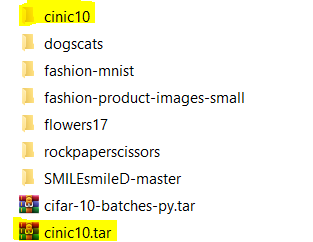

Now we should look at our dataset and load all image paths

In [39]:
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
print(data_pattern)

C:\Users\Zeki\.keras\datasets\cinic10\*/*/*.png


In [40]:
image_paths = list(glob.glob(data_pattern))
print(f'Sample image path: {image_paths[0]}')

Sample image path: C:\Users\Zeki\.keras\datasets\cinic10\test\airplane\cifar10-test-10.png


In [41]:
print(f'There are {len(image_paths):,} images in the dataset')

There are 270,000 images in the dataset


Now let's load a single image from the dataset and print its metadata

In [42]:
sample_image = load_img(image_paths[0])
print(f'Image type: {type(sample_image)}')
print(f'Image format: {sample_image.format}')
print(f'Image mode: {sample_image.mode}') #RGB
print(f'Image size: {sample_image.size}')  #32x32

Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)


for using this image as an input to our model, we should convert it to numpy array. 

In [43]:
# Convert image to array
sample_image_array = img_to_array(sample_image)
print(f'Image type: {type(sample_image_array)}')
print(f'Image array shape: {sample_image_array.shape}') # (32,32,3)

Image type: <class 'numpy.ndarray'>
Image array shape: (32, 32, 3)


In [44]:
sample_image_array

array([[[ 90., 124., 149.],
        [ 90., 124., 149.],
        [ 91., 125., 150.],
        ...,
        [103., 131., 148.],
        [100., 128., 146.],
        [100., 129., 146.]],

       [[ 92., 127., 153.],
        [ 93., 127., 152.],
        [ 94., 128., 153.],
        ...,
        [114., 137., 151.],
        [103., 130., 148.],
        [102., 132., 152.]],

       [[ 93., 128., 153.],
        [ 93., 127., 152.],
        [ 94., 128., 152.],
        ...,
        [114., 133., 145.],
        [103., 129., 147.],
        [101., 132., 152.]],

       ...,

       [[101., 133., 154.],
        [101., 132., 153.],
        [102., 133., 154.],
        ...,
        [ 94., 124., 150.],
        [ 92., 122., 148.],
        [ 91., 122., 148.]],

       [[100., 131., 153.],
        [101., 132., 153.],
        [102., 133., 154.],
        ...,
        [ 93., 123., 149.],
        [ 90., 120., 146.],
        [ 90., 121., 147.]],

       [[ 99., 130., 152.],
        [100., 130., 151.],
        [101., 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


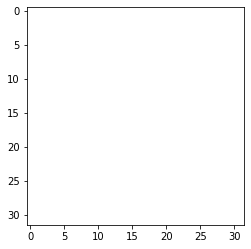

In [47]:
plt.imshow(sample_image_array)

 NOTE : 'imshow with RGB data ([0..1] for floats or [0..255] for integers)' Because of that we should divide every pixel to 255!!!!

In [45]:
sample_image_array/255

array([[[0.3529412 , 0.4862745 , 0.58431375],
        [0.3529412 , 0.4862745 , 0.58431375],
        [0.35686275, 0.49019608, 0.5882353 ],
        ...,
        [0.40392157, 0.5137255 , 0.5803922 ],
        [0.39215687, 0.5019608 , 0.57254905],
        [0.39215687, 0.5058824 , 0.57254905]],

       [[0.36078432, 0.49803922, 0.6       ],
        [0.3647059 , 0.49803922, 0.59607846],
        [0.36862746, 0.5019608 , 0.6       ],
        ...,
        [0.44705883, 0.5372549 , 0.5921569 ],
        [0.40392157, 0.50980395, 0.5803922 ],
        [0.4       , 0.5176471 , 0.59607846]],

       [[0.3647059 , 0.5019608 , 0.6       ],
        [0.3647059 , 0.49803922, 0.59607846],
        [0.36862746, 0.5019608 , 0.59607846],
        ...,
        [0.44705883, 0.52156866, 0.5686275 ],
        [0.40392157, 0.5058824 , 0.5764706 ],
        [0.39607844, 0.5176471 , 0.59607846]],

       ...,

       [[0.39607844, 0.52156866, 0.6039216 ],
        [0.39607844, 0.5176471 , 0.6       ],
        [0.4       , 0

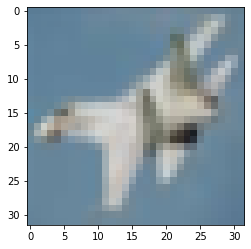

In [46]:
plt.imshow(sample_image_array / 255.0)

 now loading a batch of images... with the help of ImageDataGenerator()

In [48]:
scale_factor = 1.0 / 255.0
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=scale_factor)

Using image_generator, we'll pick and display a random batch of 10 images

In [49]:
iterator = (image_generator.flow_from_directory(directory=data_directory,batch_size=10))

Found 270000 images belonging to 3 classes.


In [52]:
print(iterator)

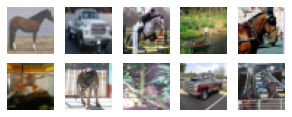

In [53]:
for batch, _ in iterator:
    plt.figure(figsize=(5, 5))
    for index, image in enumerate(batch, start=1):
        ax = plt.subplot(5, 5, index)
        plt.imshow(image)
        plt.axis('off')

    plt.show()
    break

### Loading images using the tf.data.Dataset API

In [54]:
import os
import tarfile

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import get_file

In [55]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

# Downloading the data.
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])
tar = tarfile.open(downloaded_file_location)

if not os.path.exists(data_directory):
    tar.extractall(data_directory)

print(f'Data downloaded to {data_directory}')
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])

Data downloaded to C:\Users\Zeki\.keras\datasets\cinic10


In [56]:
data_pattern

'C:\\Users\\Zeki\\.keras\\datasets\\cinic10\\*/*/*.png'

In [57]:
image_dataset = tf.data.Dataset.list_files(data_pattern)

In [58]:
image_dataset

<ShuffleDataset shapes: (), types: tf.string>

In [60]:
for file_path in image_dataset.take(3):
    sample_path = file_path.numpy()
    print(f'Sample image path: {sample_path}')

Sample image path: b'C:\\Users\\Zeki\\.keras\\datasets\\cinic10\\valid\\ship\\n03662601_15823.png'
Sample image path: b'C:\\Users\\Zeki\\.keras\\datasets\\cinic10\\valid\\truck\\cifar10-train-3045.png'
Sample image path: b'C:\\Users\\Zeki\\.keras\\datasets\\cinic10\\train\\automobile\\cifar10-train-49286.png'


In [61]:
for file_path in image_dataset.take(1):
    sample_path = file_path.numpy()
    print(f'Sample image path: {sample_path}')

Sample image path: b'C:\\Users\\Zeki\\.keras\\datasets\\cinic10\\train\\bird\\n02004131_4972.png'


 We prepared the path for single image.. now load it and convert tot array for neural network

In [62]:
sample_image = tf.io.read_file(sample_path)

In [63]:
print(f'Image type: {type(sample_image)}')

Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [64]:
sample_image = tf.image.decode_png(sample_image, channels=3)

In [65]:
sample_image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[105,  99,  55],
        [ 98, 102,  52],
        [ 90, 106,  49],
        ...,
        [115, 115,  66],
        [140, 130,  77],
        [115, 118,  60]],

       [[ 83,  88,  43],
        [ 95,  91,  48],
        [ 87,  93,  43],
        ...,
        [ 46,  43,  32],
        [ 90,  80,  52],
        [123, 115,  60]],

       [[ 98, 100,  53],
        [ 79,  86,  44],
        [ 79,  93,  44],
        ...,
        [ 61,  68,  32],
        [ 92,  89,  39],
        [ 94,  91,  40]],

       ...,

       [[ 56,  80,  26],
        [ 86, 119,  16],
        [116, 147,  42],
        ...,
        [ 72,  92,  29],
        [ 87, 109,  48],
        [ 82, 108,  44]],

       [[ 53,  84,  22],
        [ 62,  90,  32],
        [ 47,  81,  17],
        ...,
        [ 97, 119,  43],
        [ 82, 108,  35],
        [ 83, 107,  37]],

       [[ 75, 100,  37],
        [ 67,  88,  29],
        [ 87, 101,  33],
        ...,
        [ 88,  99,  47]

In [66]:
print(f'Image type: {type(sample_image)}')

Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [67]:
sample_image = sample_image.numpy()

In [68]:
print(f'Image type: {type(sample_image)}')

Image type: <class 'numpy.ndarray'>


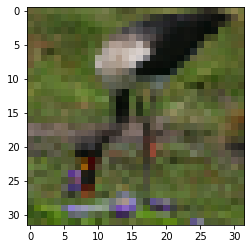

In [69]:
plt.imshow(sample_image / 255.0)

 Like the previous section, show 10 images from dataset. Take the first 10 elements of image_dataset, decode and normalize them, and then display them

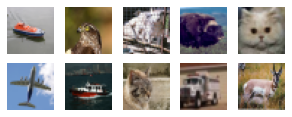

In [70]:
# Load a a batch of images.
plt.figure(figsize=(5, 5))
for index, image_path in enumerate(image_dataset.take(10), start=1):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, np.float32)

    ax = plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.axis('off')

plt.show()
plt.close()